In [1]:
# 구글 드라이브 마운트
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
# 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 데이터 불러오기, gameId column 제거
df_all = pd.read_csv('/content/gdrive/My Drive/data/high_diamond_ranked_10min.csv')
df_all = df_all.drop(['gameId'], axis='columns')

df_data = df_all.iloc[:, 1:]
df_label = df_all.iloc[:, 0]

print(df_all.columns)
print(df_data.shape)
print(df_label.shape)

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')
(9879, 38)
(9879,)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_data, df_label, test_size=0.2, random_state=1234)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7903, 38)
(1976, 38)
(7903,)
(1976,)


In [42]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0, max_depth=6, criterion='gini', splitter='random' )
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
prediction = model.predict(X_test)

acc = 100 * accuracy_score(y_test, prediction)
pre = 100 * precision_score(y_test, prediction)
rec = 100 * recall_score(y_test,prediction)
f1 = 100 * f1_score(y_test,prediction)

print('accuracy : %.2f%%'%(acc))
print('Precision: %.2f%%\nRecall: %.2f%%\nF1-score: %.2f%% '%(pre, rec, f1))

accuracy : 70.19%
Precision: 71.32%
Recall: 66.43%
F1-score: 68.79% 


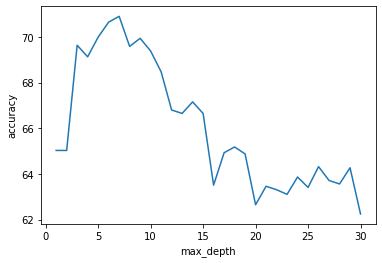

In [61]:
depths = range(1, 31)
acc = np.zeros([30])

for i in depths:
  model = DecisionTreeClassifier(random_state=0, criterion='gini', splitter='random', max_depth=i)
  model.fit(X_train, y_train)
  prediction = model.predict(X_test)
  acc[i-1] = 100 * accuracy_score(y_test, prediction)

plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.plot(depths, acc)